<a href="https://colab.research.google.com/github/1004516/SE-ALES-Y-SISTEMAS/blob/main/EJERCICIOS%20TALLER%202/Simulacion%20punto%201%2C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THD (senoidal pura): 0.00%
THD (cuadrada): 42.45%
THD (senoidal distorsionada): 33.54%


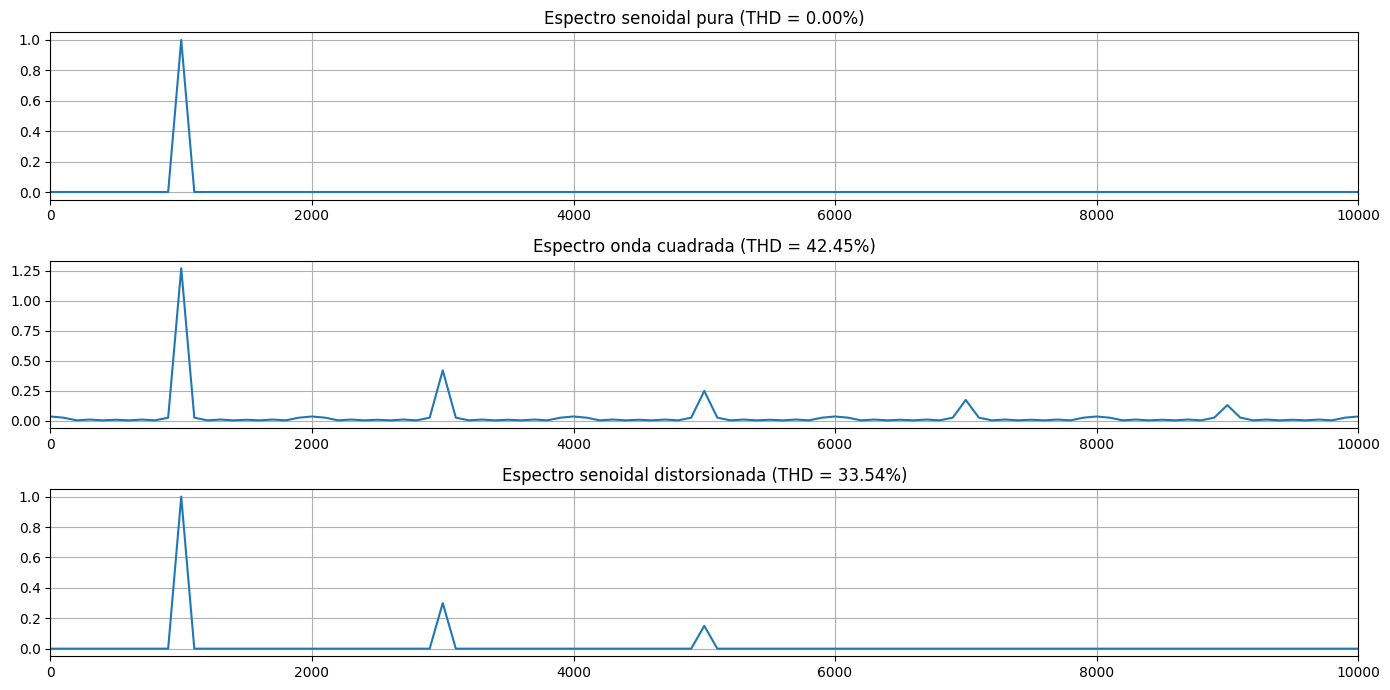

In [24]:
# ================================================================
# Taller 2 - Señales y Sistemas 2025
# Punto 1.7 - Cálculo de Distorsión Armónica Total (THD)
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, rfftfreq

# Parámetros de simulación
fs = 50000      # Frecuencia de muestreo [Hz]
f0 = 1000       # Frecuencia fundamental [Hz]
T = 0.01        # Duración total [s]
t = np.arange(0, T, 1/fs)

# Señales de prueba
# 1. Senoidal pura
x_sin = np.sin(2*np.pi*f0*t)

# 2. Onda cuadrada (no senoidal)
x_square = np.sign(np.sin(2*np.pi*f0*t))

# 3. Señal senoidal distorsionada (añadir armónicos)
x_dist = np.sin(2*np.pi*f0*t) + 0.3*np.sin(2*np.pi*3*f0*t) + 0.15*np.sin(2*np.pi*5*f0*t)

# FFT
def spectrum(x):
    N = len(x)
    X = np.abs(rfft(x))/N * 2  # Amplitud normalizada
    f = rfftfreq(N, 1/fs)
    return f, X

# Función para calcular THD
def calc_thd(x, f0, fs):
    f, X = spectrum(x)
    # Encuentra los índices de las frecuencias de los armónicos
    harmonics = [np.argmin(np.abs(f - n*f0)) for n in range(1, 10)]  # 10 armónicos
    amps = X[harmonics]
    A1 = amps[0]
    An = amps[1:]
    thd = np.sqrt(np.sum(An**2)) / A1
    return thd, f, X

# Cálculo para cada señal
thd_sin, f_sin, X_sin = calc_thd(x_sin, f0, fs)
thd_square, f_square, X_square = calc_thd(x_square, f0, fs)
thd_dist, f_dist, X_dist = calc_thd(x_dist, f0, fs)

# Resultados
print(f"THD (senoidal pura): {thd_sin*100:.2f}%")
print(f"THD (cuadrada): {thd_square*100:.2f}%")
print(f"THD (senoidal distorsionada): {thd_dist*100:.2f}%")

# Graficar espectros
plt.figure(figsize=(14,7))
plt.subplot(3,1,1)
plt.plot(f_sin, X_sin); plt.xlim(0, 10000)
plt.title(f"Espectro senoidal pura (THD = {thd_sin*100:.2f}%)"); plt.grid(True)

plt.subplot(3,1,2)
plt.plot(f_square, X_square); plt.xlim(0, 10000)
plt.title(f"Espectro onda cuadrada (THD = {thd_square*100:.2f}%)"); plt.grid(True)

plt.subplot(3,1,3)
plt.plot(f_dist, X_dist); plt.xlim(0, 10000)
plt.title(f"Espectro senoidal distorsionada (THD = {thd_dist*100:.2f}%)"); plt.grid(True)

plt.tight_layout()
plt.show()
